In [ ]:
!pip install monai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import os
import numpy as np
import SimpleITK as sitk
from nipype.interfaces import fsl
from datetime import datetime
from skimage.io import imread,imsave
import pandas as pd
import cv2 as cv
import cv2
from scipy.stats import entropy
from dltk.io.preprocessing import whitening

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:00


In [ ]:
import os
import torch
import monai
from monai.transforms import LoadImage, Compose, EnsureType, ScaleIntensity

# Base directory containing subdirectories for MCI, AD, CN
base_dir = 'AFFINE_REG_SKS_MASK_2D_IMAGES_DIR/training'
save_dir = 'AFFINE_REG_SKS_MASK_2D_IMAGES_DIR1'

transform = Compose([
    LoadImage(image_only=True),
    EnsureType(),
    ScaleIntensity(),
])

def process_images(directory, save_directory):
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.nii')]
    dataset = Dataset(data=image_files, transform=transform)
    loader = DataLoader(dataset, batch_size=1, num_workers=4)

    for img_path in image_files:
        img = torch.load(img_path)


        mean_val = torch.mean(img)
        std_val = torch.std(img)


        norm_transform = Compose([
        NormalizeIntensity(subtrahend=mean_val, divisor=std_val)
        ])

        save_path = os.path.join(save_directory, os.path.basename(img_path))
        torch.save(norm_transform, save_path)

# Process images in each subdirectory
for category in ['MCI', 'AD', 'CN']:
    category_dir = os.path.join(base_dir, category)
    save_category_dir = os.path.join(save_dir, category)
    os.makedirs(save_category_dir, exist_ok=True)
    process_images(category_dir, save_category_dir)


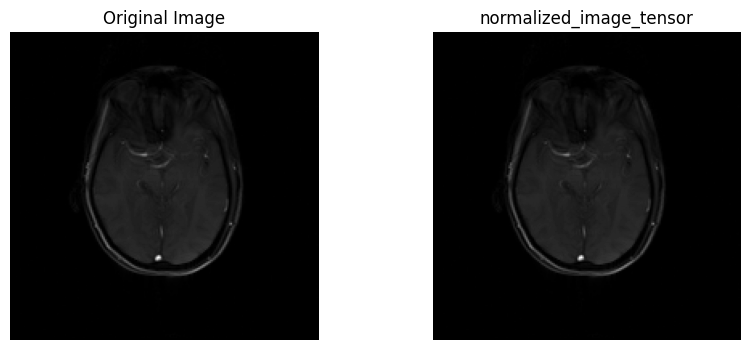

In [ ]:
import matplotlib.pyplot as plt

# Display settings for Jupyter notebooks
%matplotlib inline

# Plot the original image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the normalized image
plt.subplot(1, 2, 2)
plt.imshow(normalized_image_tensor, cmap='gray')
plt.title('normalized_image_tensor')
plt.axis('off')

plt.show()


In [ ]:
!pip install nibabel matplotlib

In [ ]:
import numpy as np

# Assuming the first axis is the correct one for axial slices
slice_idx = image_data.shape[0] // 2  # Index for the middle slice

# Select the middle axial slice from both original and normalized volumes
axial_slice_original = image_data[slice_idx, :, :]
axial_slice_normalized = normalized_data[slice_idx, :, :]


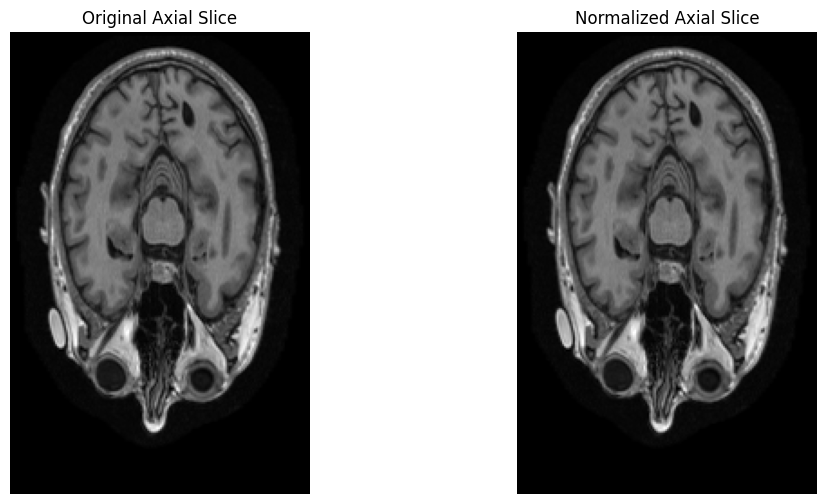

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original axial slice
plt.subplot(1, 2, 1)
plt.imshow(axial_slice_original, cmap='gray', origin='lower')
plt.title('Original Axial Slice')
plt.axis('off')  # Hide the axes ticks

# Normalized axial slice
plt.subplot(1, 2, 2)
plt.imshow(axial_slice_normalized, cmap='gray', origin='lower')
plt.title('Normalized Axial Slice')
plt.axis('off')  # Hide the axes ticks

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


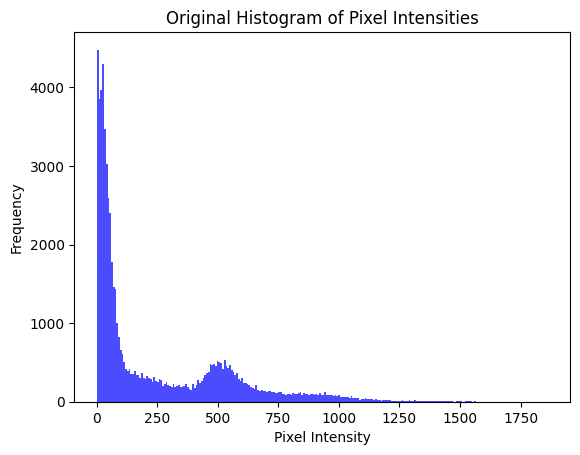

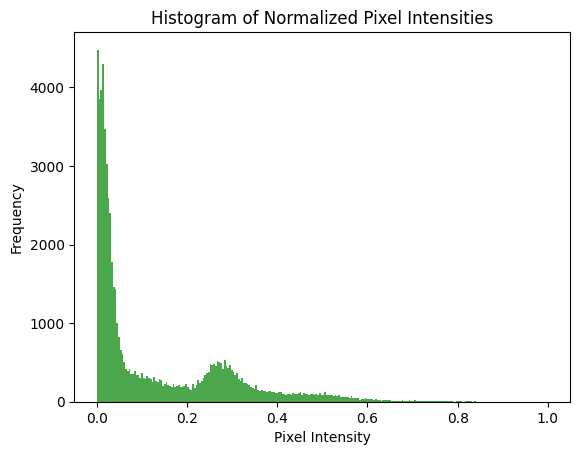

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom

def plot_mri_histogram(mri_image, title, color):
    # Flatten the image to a 1D array for histogram calculation
    pixel_values = mri_image.flatten()

    # Plot histogram with an appropriate number of bins
    plt.hist(pixel_values, bins=256, color=color, alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Load the DICOM file (assuming it's already in your local environment)
# Replace 'path_to_dicom_file.dcm' with the actual path to your DICOM file
dicom_path = '/AFFINE_REG_SKS_MASK_2D_IMAGES_DIR/training/AD/I92398.nii'
ds = pydicom.dcmread(dicom_path)
mri_image = ds.pixel_array

dicom_path2 = '/AFFINE_REG_SKS_MASK_2D_IMAGES_DIR1/training/AD/I92398.nii'
ds = pydicom.dcmread(dicom_path)
normalized_mri_image = ds.pixel_array

# Plot the original histogram with a color of choice, e.g., blue
plot_mri_histogram(mri_image, 'Original Histogram of Pixel Intensities', 'blue')

# Plot the histogram of the normalized image with a different color, e.g., green
plot_mri_histogram(normalized_mri_image, 'Histogram of Normalized Pixel Intensities', 'green')


In [ ]:
import os
import numpy as np
import SimpleITK as sitk
from skimage.io import imsave
from scipy.stats import entropy

SKS_MASK_DIR = 'C:/Users/sweth/Downloads/MASK_DIR''
AFFINE_REG_SKS_MASK_2D_IMAGES_DIR = 'C:/Users/sweth/AFFINE_REG_SKS_MASK_2D_IMAGES_DIR'

padd = 5
start = 25
end = 70
nb_img = 16

for indx, file in enumerate(os.listdir(SKS_MASK_DIR)):
    array = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(SKS_MASK_DIR, file)))

    graid_image = np.array([])
    data = np.array([])
    entpy_data = {}

    for i in range(start, end):
        value, counts = np.unique(array[i, :, :], return_counts=True)
        entpy_data[i] = entropy(counts, base=2)
    entpy_data = {k: v for k, v in sorted(entpy_data.items(), reverse=True, key=lambda item: item[1])}
    index_of_slices = list(entpy_data.keys())[0:nb_img]

    for i, max_indx in enumerate(index_of_slices):
        if (i + 1) % 4 == 0:
            data = np.hstack((data, array[max_indx, :, :]))
            if graid_image.size < 1:
                graid_image = data.copy()
            else:
                graid_image = np.vstack((graid_image, data))
            data = np.array([])

        else:
            if data.size < 1:
                data = array[max_indx, :, :]
            else:
                data = np.hstack((data, array[max_indx, :, :]))

    imsave(os.path.join(AFFINE_REG_SKS_MASK_2D_IMAGES_DIR, f'{file.replace(".nii.gz", "")}.png'), graid_image)
